In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv')

data=data.drop(columns=['Unnamed: 0','attacking_work_rate_encoded','defensive_work_rate_encoded'])


In [4]:
# Check and clean
print(data.isnull().sum())


crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
positioning               0
vision                    0
penalties                 0
aggression                0
interceptions             0
marking                   0
standing_tackle           0
sliding_tackle            0
gk_diving                 0
gk_handling               0
gk_kicking                0
gk_positioning            0
gk_reflexes               0
preferred_foot_encoded    0
player_role               0
dtype: int64


In [5]:

y = data['player_role']
X = data.drop(columns=['player_role'])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Using Decision Tree depth=1 as base estimator
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=1,
    random_state=42
)

# Train and predict
ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)
ada_pred_proba = ada.predict_proba(X_test_scaled)

# Evaluation: Accuracy
print(f'AdaBoost Test Accuracy: {accuracy_score(y_test, ada_pred) * 100:.2f}%')
print('\nClassification Report:\n', classification_report(y_test, ada_pred))


AdaBoost Test Accuracy: 80.83%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       0.77      0.95      0.85       420
           2       0.94      0.32      0.48       151
           3       0.96      0.45      0.62       159
           4       0.78      0.97      0.87      1067
           5       0.91      0.27      0.42        74
           6       0.00      0.00      0.00        61
           7       0.94      0.19      0.32        89

    accuracy                           0.81      2212
   macro avg       0.79      0.52      0.57      2212
weighted avg       0.81      0.81      0.77      2212



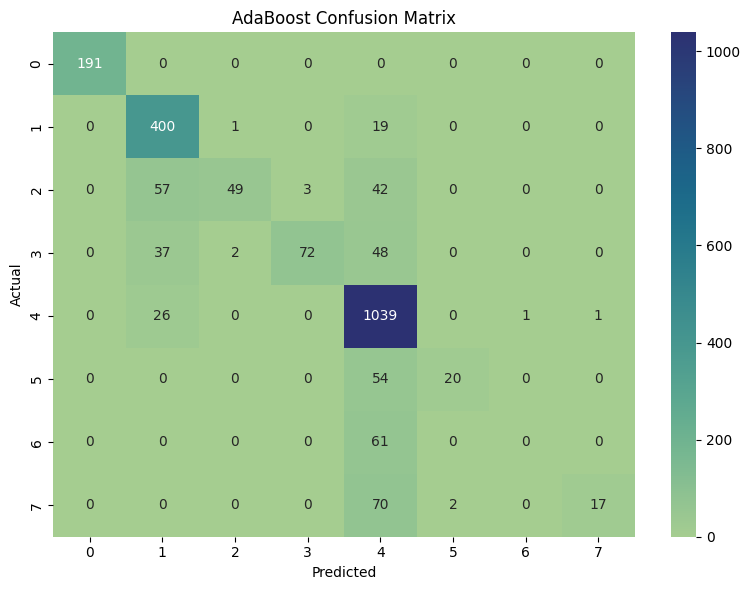

In [8]:
cm_ada = confusion_matrix(y_test, ada_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='crest')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


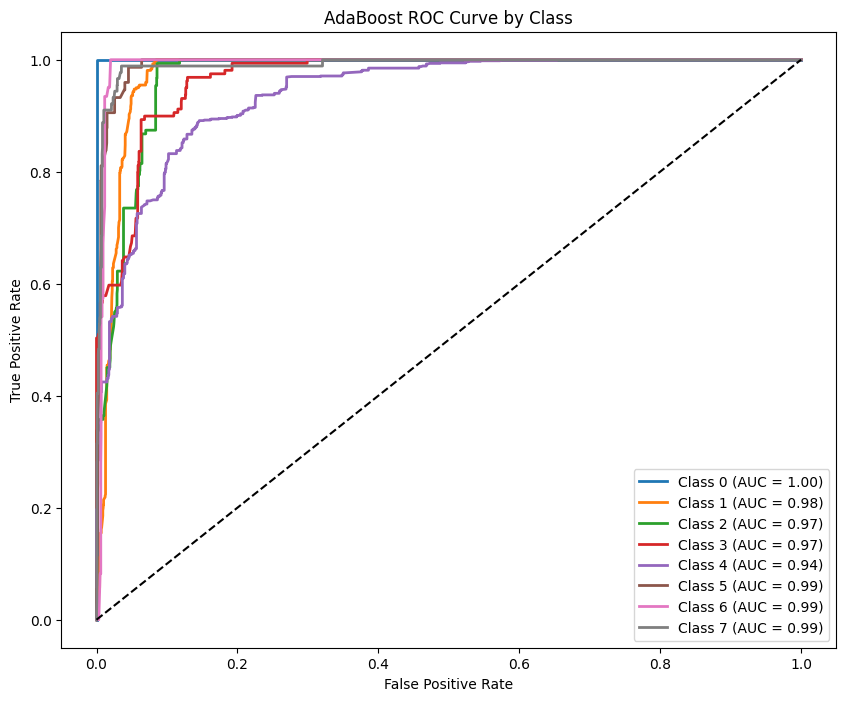

In [9]:
# Binarize class labels for ROC (multi-class)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], ada_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve by Class')
plt.legend(loc='lower right')
plt.show()


In [23]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(
    learning_rate=0.005,
    max_iter=150,
    max_leaf_nodes=5,
    random_state=42
)
hgb.fit(X_train_scaled, y_train)
hgb_pred = hgb.predict(X_test_scaled)
hgb_pred_proba = hgb.predict_proba(X_test_scaled)

# Accuracy & Report
print(f'HistGradientBoosting Test Accuracy: {accuracy_score(y_test, hgb_pred) * 100:.2f}%')
print('\nHistGradientBoosting Classification Report:\n', classification_report(y_test, hgb_pred))

HistGradientBoosting Test Accuracy: 96.70%

HistGradientBoosting Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       191
           1       1.00      1.00      1.00       420
           2       1.00      0.94      0.97       151
           3       1.00      0.90      0.95       159
           4       0.94      1.00      0.97      1067
           5       1.00      0.86      0.93        74
           6       1.00      0.69      0.82        61
           7       1.00      0.81      0.89        89

    accuracy                           0.97      2212
   macro avg       0.99      0.90      0.94      2212
weighted avg       0.97      0.97      0.97      2212



In [11]:
hgb = HistGradientBoostingClassifier(
    learning_rate=0.05,
    max_iter=300,
    max_leaf_nodes=31,
    random_state=42
)
hgb.fit(X_train_scaled, y_train)
hgb_pred = hgb.predict(X_test_scaled)
hgb_pred_proba = hgb.predict_proba(X_test_scaled)

# Accuracy & Report
print(f'HistGradientBoosting Test Accuracy: {accuracy_score(y_test, hgb_pred) * 100:.2f}%')
print('\nHistGradientBoosting Classification Report:\n', classification_report(y_test, hgb_pred))


HistGradientBoosting Test Accuracy: 99.91%

HistGradientBoosting Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       1.00      1.00      1.00       420
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       159
           4       1.00      1.00      1.00      1067
           5       1.00      0.99      0.99        74
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        89

    accuracy                           1.00      2212
   macro avg       1.00      1.00      1.00      2212
weighted avg       1.00      1.00      1.00      2212



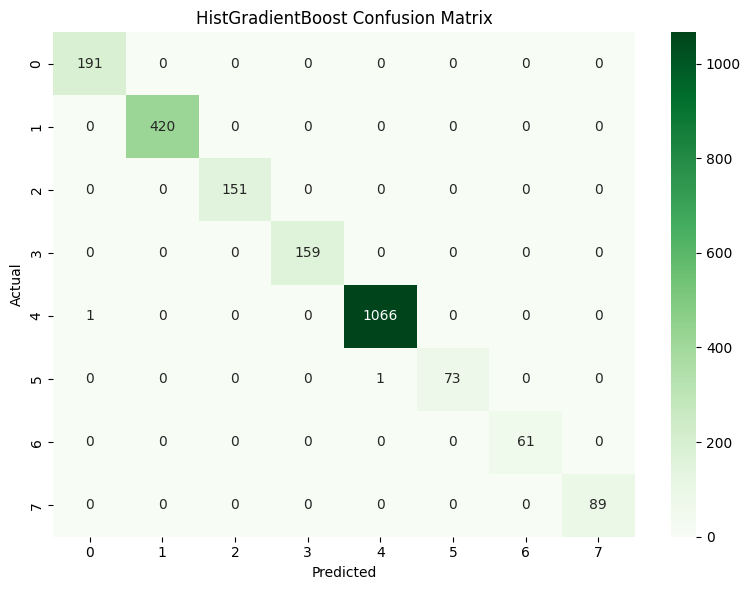

In [12]:
cm_hgb = confusion_matrix(y_test, hgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hgb, annot=True, fmt='d', cmap='Greens')
plt.title('HistGradientBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


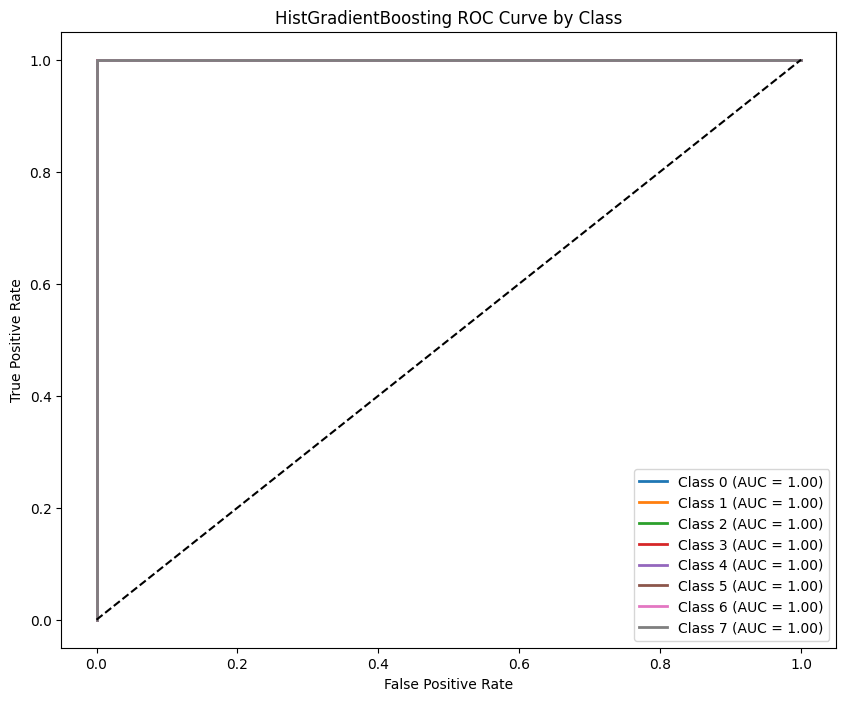

In [13]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], hgb_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('HistGradientBoosting ROC Curve by Class')
plt.legend(loc='lower right')
plt.show()


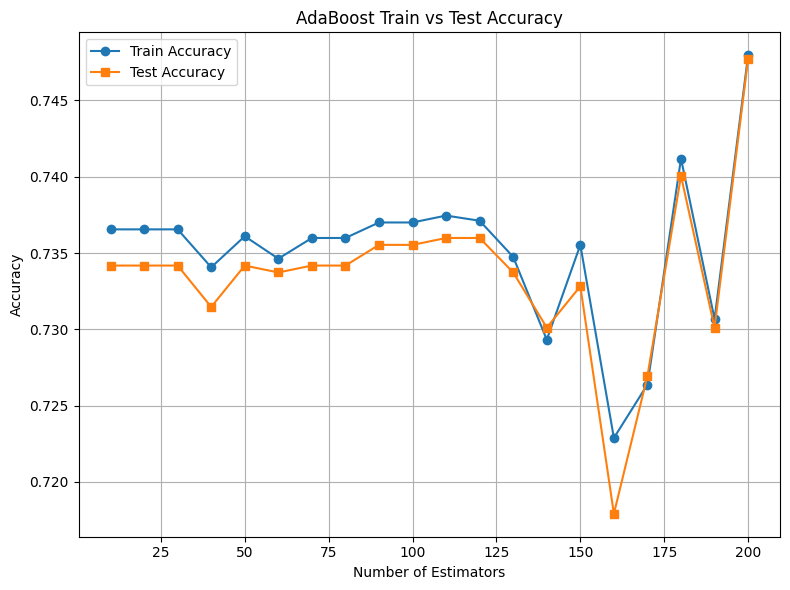

In [14]:
train_acc = []
test_acc = []
n_estimators_range = range(10, 210, 10)  # From 10 to 200 estimators in steps of 10

for n in n_estimators_range:
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n,
        learning_rate=0.5,
        random_state=42
    )
    ada.fit(X_train_scaled, y_train)
    train_acc.append(ada.score(X_train_scaled, y_train))
    test_acc.append(ada.score(X_test_scaled, y_test))

plt.figure(figsize=(8,6))
plt.plot(n_estimators_range, train_acc, marker='o', label='Train Accuracy')
plt.plot(n_estimators_range, test_acc, marker='s', label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()